# Data Discretization

Data discretization is the process of transforming continuous data into discrete data. It is a process of reducing the number of categories in a continuous variable. For example, if we have a variable that ranges from 1 to 100, we can discretize it into 10 categories, such as 1-10, 11-20, 21-30, etc. This will reduce the number of categories in the variable and make it more manageable for analysis.

In [19]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [20]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [21]:
# handle missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

<Axes: xlabel='age', ylabel='Count'>

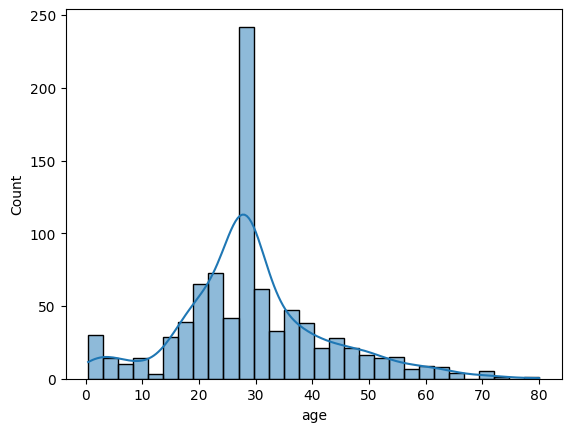

In [22]:
sns.histplot(df['age'], kde=True)

In [23]:
# Age Discretization
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
df['Age_bin'] = age_discretizer.fit_transform(df[['age']])
df.head()

c:\Users\Farhan Ali\.conda\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,6.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,5.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,5.0


<Axes: xlabel='age', ylabel='Count'>

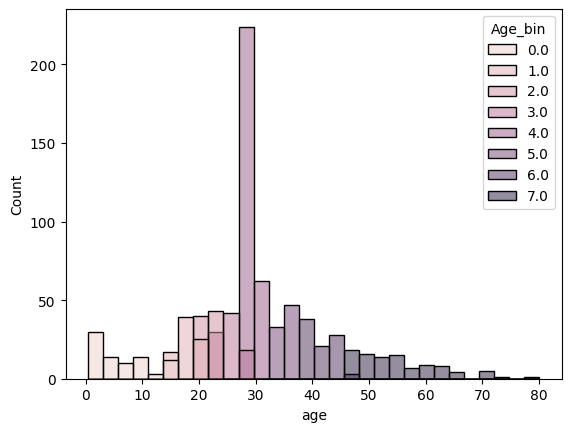

In [24]:
sns.histplot(df, x='age', hue='Age_bin')